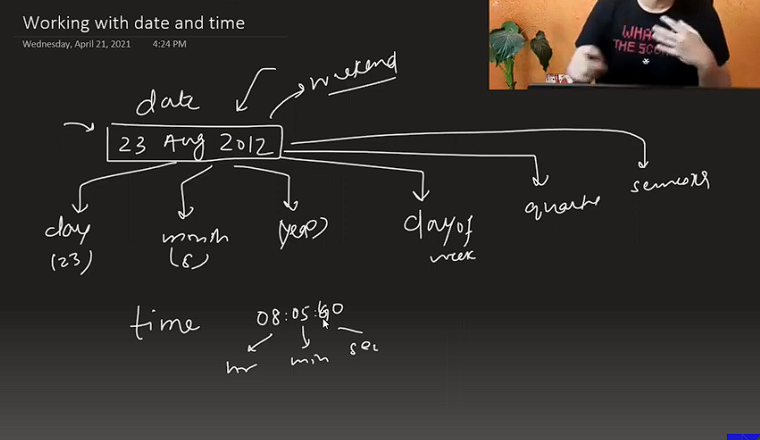

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
tf = pd.read_csv('messages.csv')

In [23]:
df = pd.read_csv('orders.csv')

In [24]:
tf.sample(3)

,date,msg
933,2014-06-02 00:36:00,Нужна ж 097-57-55-794
441,2013-12-28 01:31:00,познакомлюсь с дев. Для с/о 18-20лет ваня!0993...
407,2012-11-04 01:04:00,вот так всегда и девушки должны предлагать аяя...


In [25]:
df.sample(3)

,date,product_id,city_id,orders
175,2018-09-04,3125,1,10
181,2019-04-12,1744,13,2
341,2019-05-04,1097,26,17


In [26]:
tf.dtypes

date    object
msg     object
dtype: object

In [27]:
df.dtypes

date          object
product_id     int64
city_id        int64
orders         int64
dtype: object

### Working with dates

In [31]:
#convering it to date time data typ
df['date'] = pd.to_datetime(df['date'])

In [32]:
df.dtypes

date          datetime64[ns]
product_id             int64
city_id                int64
orders                 int64
dtype: object

In [33]:
df['date_year'] = df['date'].dt.year 

In [36]:
df.columns

Index(['date', 'product_id', 'city_id', 'orders', 'date_year'], dtype='object')

In [37]:
df.sample(1)

,date,product_id,city_id,orders,date_year
263,2019-11-03,6694,25,2,2019


In [38]:
df['date_month'] = df['date'].dt.month

In [39]:
df.sample(1)

,date,product_id,city_id,orders,date_year,date_month
730,2019-06-22,2607,22,1,2019,6


In [40]:
df['month name'] = df['date'].dt.month_name()

In [41]:
df.sample(1)

,date,product_id,city_id,orders,date_year,date_month,month name
998,2019-03-03,1503,21,2,2019,3,March


In [42]:
df['day'] = df['date'].dt.day

In [43]:
df.sample(1)

,date,product_id,city_id,orders,date_year,date_month,month name,day
513,2019-10-30,6975,3,3,2019,10,October,30


In [46]:
# week day = 1 means tuesday
# therefore week day = 5 means it was saturday
df['week day'] = df['date'].dt.dayofweek

In [47]:
df.sample(1)

,date,product_id,city_id,orders,date_year,date_month,month name,day,week day
202,2018-11-21,192,23,1,2018,11,November,21,2


In [48]:
df['week day name'] = df['date'].dt.day_name()

In [50]:
df.sample(3)

,date,product_id,city_id,orders,date_year,date_month,month name,day,week day,week day name
134,2019-11-17,6049,16,1,2019,11,November,17,6,Sunday
852,2018-09-04,2706,9,8,2018,9,September,4,1,Tuesday
893,2018-08-02,1943,13,1,2018,8,August,2,3,Thursday


In [51]:
df.drop(columns=['product_id', 'city_id', 'orders'])

,date,date_year,date_month,month name,day,week day,week day name
0,2019-12-10,2019,12,December,10,1,Tuesday
1,2018-08-15,2018,8,August,15,2,Wednesday
2,2018-10-23,2018,10,October,23,1,Tuesday
3,2019-08-17,2019,8,August,17,5,Saturday
4,2019-01-06,2019,1,January,6,6,Sunday
...,...,...,...,...,...,...,...
995,2018-10-08,2018,10,October,8,0,Monday
996,2018-12-06,2018,12,December,6,3,Thursday
997,2019-05-07,2019,5,May,7,1,Tuesday
998,2019-03-03,2019,3,March,3,6,Sunday


In [52]:
# custom code to check weather a weekend day or not ?
df['is weekend'] = np.where(df['week day name'].isin(['Saturday','Sunday']), 1,0)

In [57]:
df.sample(2)

,date,product_id,city_id,orders,date_year,date_month,month name,day,week day,week day name,is weekend
340,2019-11-02,2088,26,8,2019,11,November,2,5,Saturday,1
650,2019-05-21,5626,22,1,2019,5,May,21,1,Tuesday,0


In [59]:
df['year week no.'] = df['date'].dt.week()

AttributeError: 'DatetimeProperties' object has no attribute 'week'

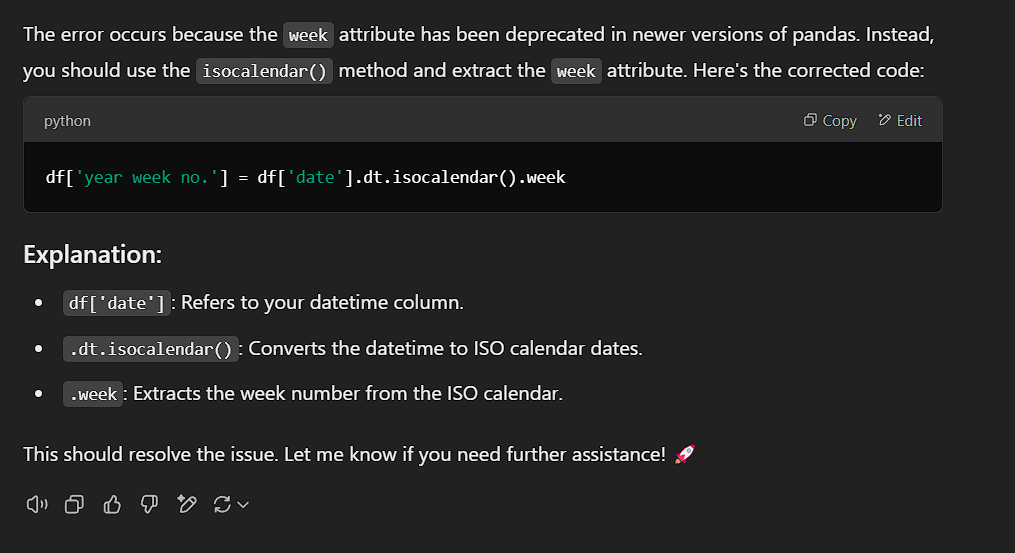

In [60]:
df['year week no.'] = df['date'].dt.isocalendar().week

In [61]:
df.sample(3)

,date,product_id,city_id,orders,date_year,date_month,month name,day,week day,week day name,is weekend,year week no.
169,2019-03-25,2876,1,4,2019,3,March,25,0,Monday,0,13
749,2019-05-31,4984,25,3,2019,5,May,31,4,Friday,0,22
487,2019-04-18,6095,9,1,2019,4,April,18,3,Thursday,0,16


In [63]:
df['quater'] = df['date'].dt.quarter

In [64]:
df.sample(3)

,date,product_id,city_id,orders,date_year,date_month,month name,day,week day,week day name,is weekend,year week no.,quater
647,2018-09-05,6556,23,2,2018,9,September,5,2,Wednesday,0,36,3
145,2019-04-18,351,20,2,2019,4,April,18,3,Thursday,0,16,2
929,2019-12-07,6801,3,7,2019,12,December,7,5,Saturday,1,49,4


In [67]:
# if quater is in (1,2) then 1 else for everything except (1,2) print 2
df['semester'] = np.where(df['quater'].isin([1,2]), 1,2)

In [68]:
df.sample(3)

,date,product_id,city_id,orders,date_year,date_month,month name,day,week day,week day name,is weekend,year week no.,quater,semester
443,2018-09-21,873,25,16,2018,9,September,21,4,Friday,0,38,3,2
420,2018-08-07,7288,14,5,2018,8,August,7,1,Tuesday,0,32,3,2
874,2019-05-26,2430,23,17,2019,5,May,26,6,Sunday,1,21,2,1


### Extract Time elapsed between dates

In [69]:
import datetime
today = datetime.datetime.today()
today

datetime.datetime(2025, 2, 6, 17, 25, 45, 599434)

In [72]:
today - df['date']

0     1885 days 17:25:45.599434
1     2367 days 17:25:45.599434
2     2298 days 17:25:45.599434
3     2000 days 17:25:45.599434
4     2223 days 17:25:45.599434
                 ...           
995   2313 days 17:25:45.599434
996   2254 days 17:25:45.599434
997   2102 days 17:25:45.599434
998   2167 days 17:25:45.599434
999   1941 days 17:25:45.599434
Name: date, Length: 1000, dtype: timedelta64[ns]

In [74]:
(today - df['date']).dt.days

0      1885
1      2367
2      2298
3      2000
4      2223
       ... 
995    2313
996    2254
997    2102
998    2167
999    1941
Name: date, Length: 1000, dtype: int64

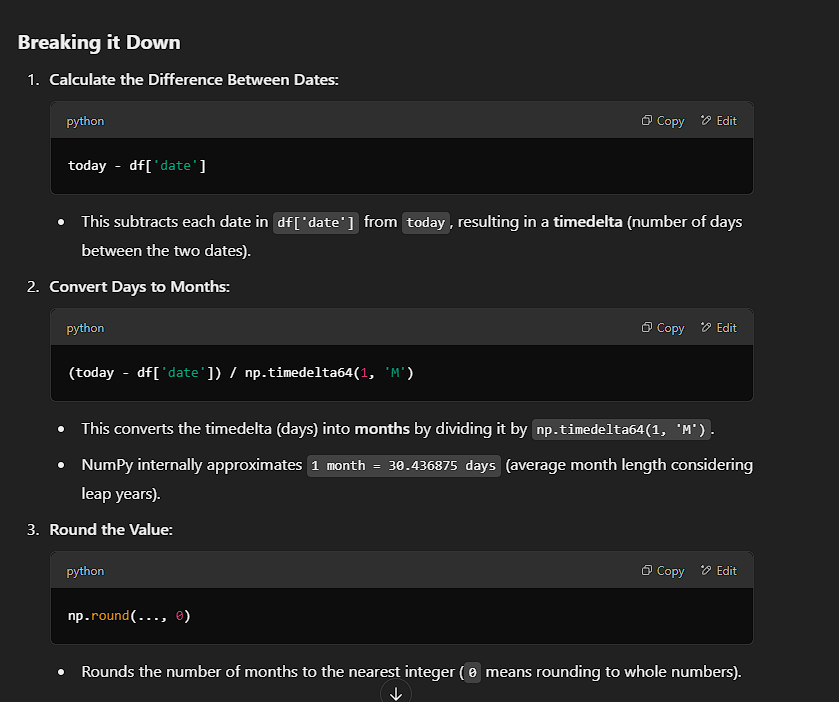

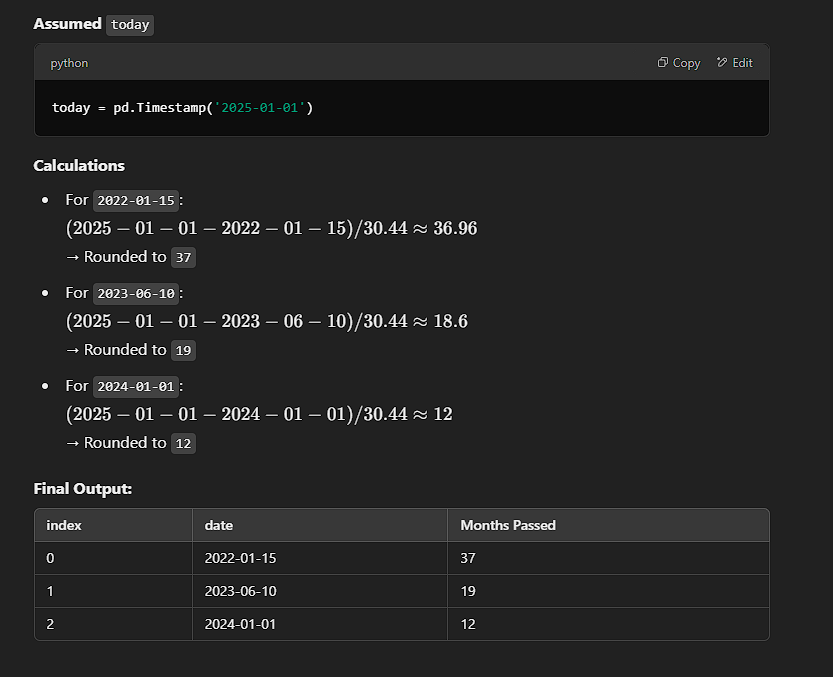

In [75]:
np.round((today -df['date']) / np.timedelta64(1, 'M'),0)

0      61.0
1      76.0
2      74.0
3      65.0
4      72.0
       ... 
995    75.0
996    73.0
997    68.0
998    70.0
999    63.0
Name: date, Length: 1000, dtype: float64

In [81]:
np.round((today -df['date']) / np.timedelta64(1, 'Y'),0)

0      5.0
1      6.0
2      6.0
3      5.0
4      6.0
      ... 
995    6.0
996    6.0
997    6.0
998    6.0
999    5.0
Name: date, Length: 1000, dtype: float64

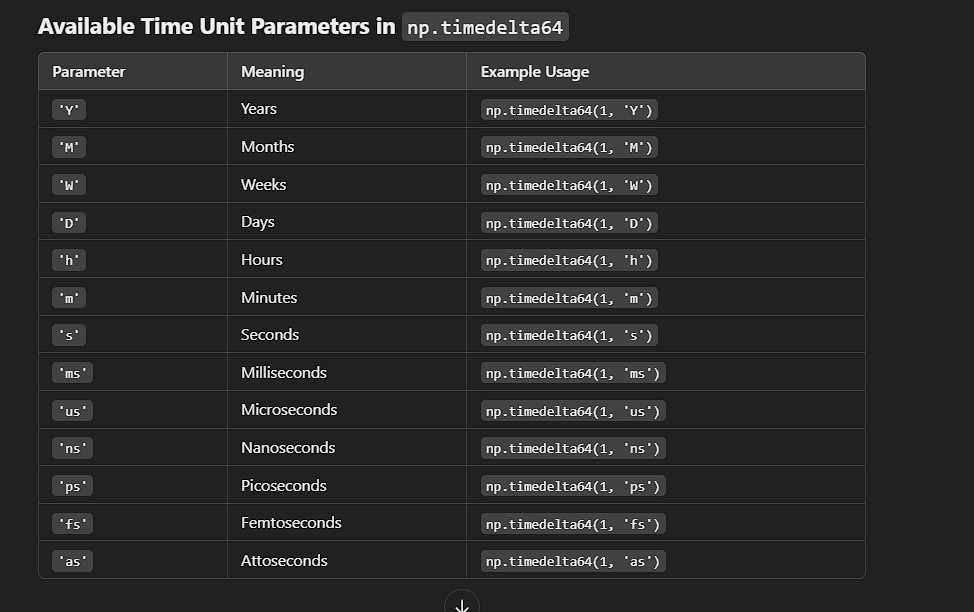

### Working with Time Series 